# LGMVIP INTERNSHIP(DATA SCIENCE)
   

#  TASK 1 = IRIS DATA ML CLASSIFICATION

#  SAPTAK BANERJEE

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score



In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
iris


{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
iris.data.shape

(150, 4)

In [4]:
iris.target.shape

(150,)

In [5]:
iris.feature_names


['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

#  Converting the data into Pandas Dataframe

In [8]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)

In [9]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
# including the target
df['target'] = iris.target

In [11]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [12]:
df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target                 int32
dtype: object

In [13]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [14]:
print(df.groupby('target').size())

target
0    50
1    50
2    50
dtype: int64


# EXPLORATORY DATA ANALYSIS AND DATA VISUALIZATION

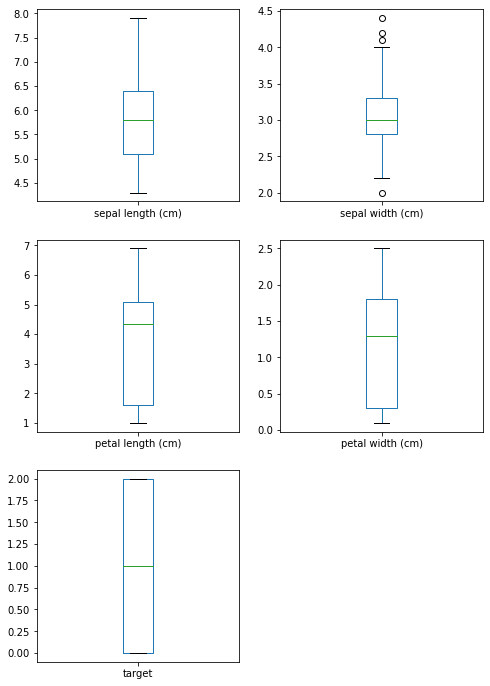

In [15]:
#  box and whsiker plots

df.plot(kind = 'box', subplots = True, layout=(3, 2), figsize = (8, 12));

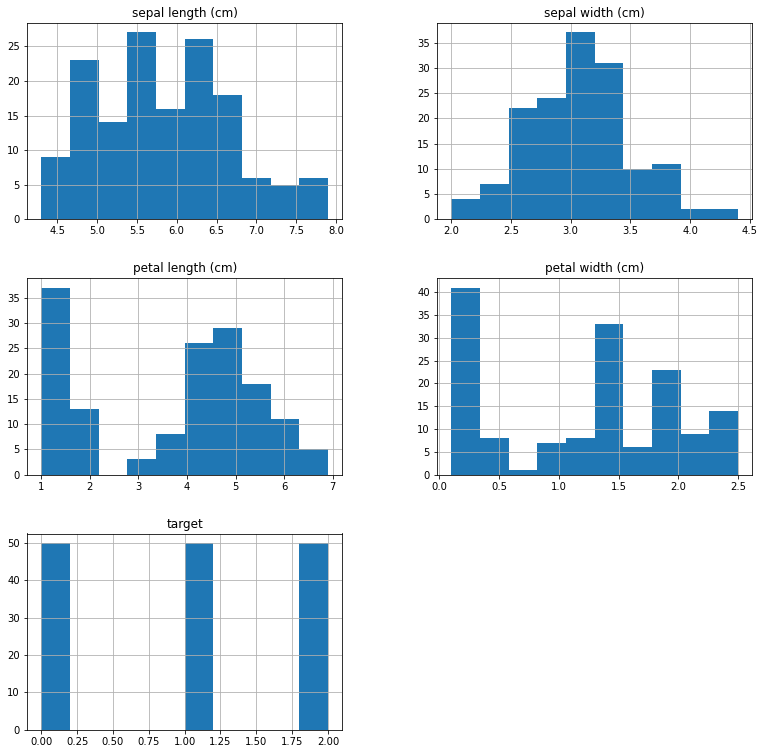

In [16]:
df.hist(figsize = (13, 13))
plt.show()

# CORRELATION PLOTS

In [17]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


<AxesSubplot:>

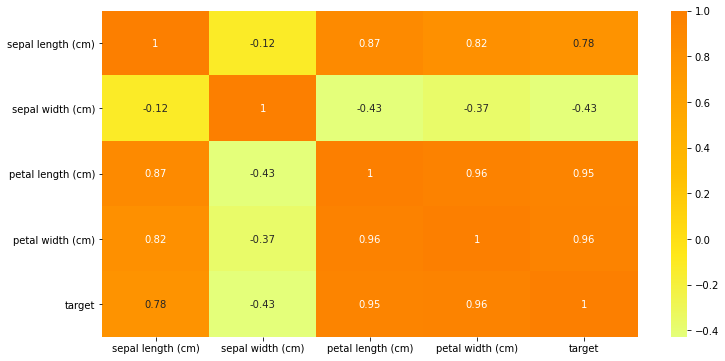

In [18]:
plt.figure(figsize = (12, 6))
sns.heatmap(df.corr(), annot=True, cmap= 'Wistia')

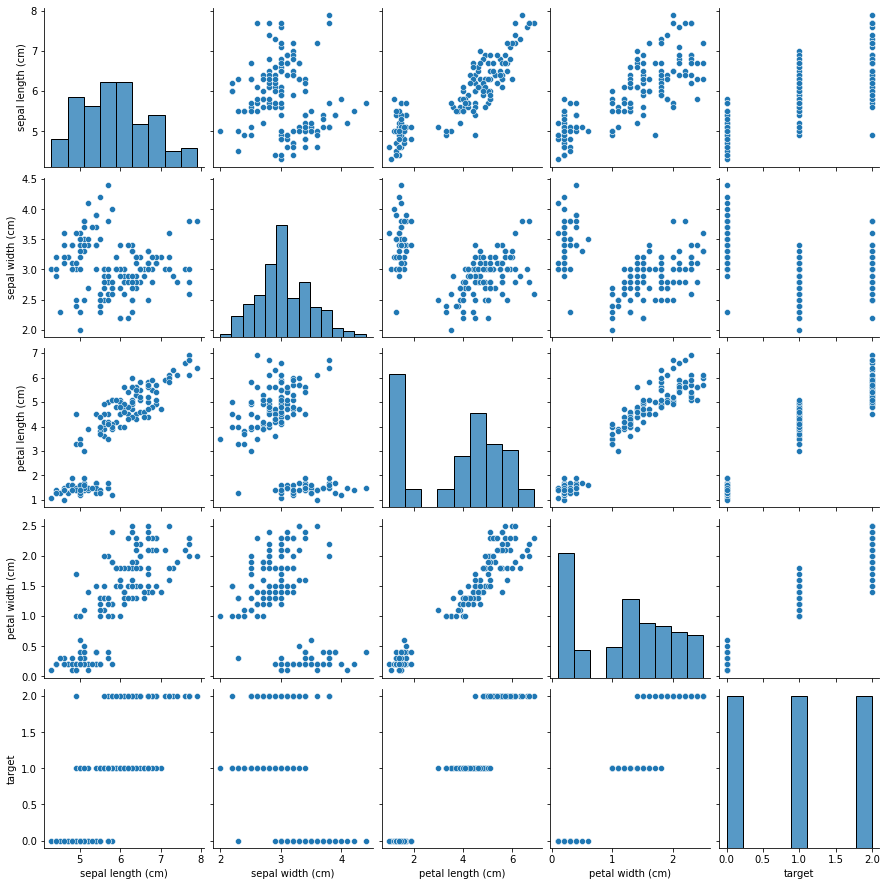

In [19]:
sns.pairplot(df)

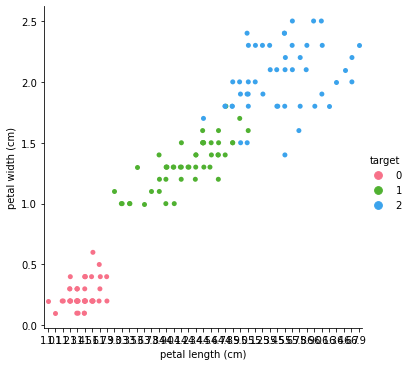

In [20]:
sns.catplot(x='petal length (cm)', y='petal width (cm)', palette='husl', hue = 'target', data=df)

#  Evaluating The Algorithms

In [32]:
#  splitting out validation dataset
array = df.values
A = array[:, 0:4]
B = array[:, 4]
validation_size = .20
seed = 7
A_train, A_validation, B_train, B_validation = train_test_split(A,B, test_size = validation_size, random_state = seed)

In [34]:
# SPOT CHECKING THE ALGORITHMS
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNG', KNeighborsClassifier()))
models.append(('CRT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))


# Evaluating each model

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits = 10, shuffle=True)
    cv_results = cross_val_score(model, A_train, B_train, cv = kfold, scoring = 'accuracy')
    results.append(cv_results)
    names.append(name)
    
    msg= '%s:, %f, (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)

C:\Users\Banerjee\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Banerjee\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

LR:, 0.983333, (0.033333)
LDA:, 0.975000, (0.053359)
KNG:, 0.983333, (0.033333)
CRT:, 0.975000, (0.038188)
NB:, 0.966667, (0.040825)
SVM:, 0.991667, (0.025000)


# Looking at the above data, it is quite evident that the SVM method is the best algorithm(accuracy = 0.991667) 

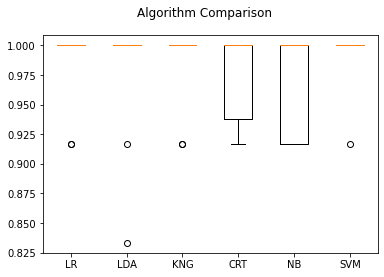

In [40]:
# COMPARING THE ALGORITHMS
from matplotlib import pyplot

fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

#  MAKING PREDICTIONS

In [42]:
# making predictions on validation of datasets

SVM =  SVC()
SVM.fit(A_train, B_train)
predictions = SVM.predict(A_validation)
print(accuracy_score(B_validation, predictions))
print(classification_report(B_validation, predictions))
print(confusion_matrix(B_validation, predictions))

0.8666666666666667
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         7
         1.0       0.83      0.83      0.83        12
         2.0       0.82      0.82      0.82        11

    accuracy                           0.87        30
   macro avg       0.88      0.88      0.88        30
weighted avg       0.87      0.87      0.87        30

[[ 7  0  0]
 [ 0 10  2]
 [ 0  2  9]]


In [43]:
# Accuracy is 86.67% : The model can predict with 86% accuracy on unseen data
# Hence, it is a good model and is less likely to make errors


#  THANK YOU!!!